# Curva ROC e AUC

A curva ROC (Receiver Operating Characteristic) é uma curva que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. A curva ROC é uma curva bidimensional com:

- Taxa de verdadeiros positivos no eixo y
- Taxa de falsos positivos no eixo x

Curva ROC (Receiver Operating Characteristic) é um gráfico que representa a performance de um modelo classificatório em diferentes limiares de decisão, plotando a Taxa de Verdadeiros Positivos (Sensibilidade) versus a Taxa de Falsos Positivos (1 - Especificidade).

A AUC (Area Under the Curve) é a área sob a curva ROC. A AUC é uma métrica de avaliação da qualidade de um modelo de classificação. Quanto maior a AUC, melhor o modelo é em prever 0s como 0s e 1s como 1s. AUC é uma métrica que resume a curva ROC em um único valor, representando a probabilidade de que o modelo classifique corretamente uma instância positiva como mais provável que uma negativa.





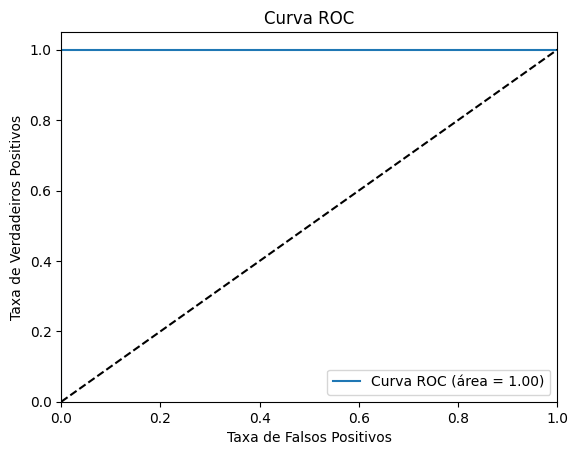

In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


probabilidades = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilidades)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
